In [1]:
from typing import TypedDict, List, Union
from langchain_ollama import ChatOllama
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage, AIMessage

In [2]:
llm = ChatOllama(model='qwen2.5')

In [3]:
class AgentState(TypedDict):
    messages: List[Union[HumanMessage, AIMessage]]

In [4]:
def llm_node(state: AgentState) -> AgentState:
    response = llm.invoke(state["messages"])
    state["messages"].append(AIMessage(response.content))
    print("STATE : ", state)
    print(f" AI : {response.content}")
    return state

In [5]:
graph = StateGraph(AgentState)
graph.add_node("llm", llm_node)

graph.add_edge(START, "llm")
graph.add_edge("llm", END)
agent = graph.compile()

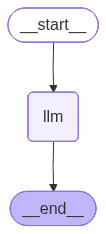

In [6]:
from IPython.display import display, Image
display(Image(agent.get_graph().draw_mermaid_png()))

In [7]:
memory = []
user_input = input("Human: ")
while user_input != "quit":
    memory.append(HumanMessage(user_input))
    # final_state = agent.invoke({"messages": memory.copy})
    final_state = agent.invoke({"messages": memory})
    user_input = input("Human: ")

Human:  hi, my name is ali


STATE :  {'messages': [HumanMessage(content='hi, my name is ali', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello Ali! Nice to meet you. How can I assist you today? Is there anything specific you'd like to talk about or any questions you have?", additional_kwargs={}, response_metadata={})]}
 AI : Hello Ali! Nice to meet you. How can I assist you today? Is there anything specific you'd like to talk about or any questions you have?


Human:  how are you?


STATE :  {'messages': [HumanMessage(content='hi, my name is ali', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello Ali! Nice to meet you. How can I assist you today? Is there anything specific you'd like to talk about or any questions you have?", additional_kwargs={}, response_metadata={}), HumanMessage(content='how are you?', additional_kwargs={}, response_metadata={}), AIMessage(content="I'm just a digital assistant, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?", additional_kwargs={}, response_metadata={})]}
 AI : I'm just a digital assistant, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?


Human:  what is my name?


STATE :  {'messages': [HumanMessage(content='hi, my name is ali', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello Ali! Nice to meet you. How can I assist you today? Is there anything specific you'd like to talk about or any questions you have?", additional_kwargs={}, response_metadata={}), HumanMessage(content='how are you?', additional_kwargs={}, response_metadata={}), AIMessage(content="I'm just a digital assistant, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?", additional_kwargs={}, response_metadata={}), HumanMessage(content='what is my name?', additional_kwargs={}, response_metadata={}), AIMessage(content="Your name is Ali. How can I assist you further with that information? Is there anything specific you're looking for or any questions you'd like to ask?", additional_kwargs={}, response_metadata={})]}
 AI : Your name is Ali. How can I assist you further with that information? Is there anything specific you're look

Human:  quit


In [17]:
print(memory)

[HumanMessage(content='hi, my name is ali', additional_kwargs={}, response_metadata={}), AIMessage(content="Hello Ali! Nice to meet you. How can I assist you today? Is there anything specific you'd like to talk about or any questions you have?", additional_kwargs={}, response_metadata={}), HumanMessage(content='how are you?', additional_kwargs={}, response_metadata={}), AIMessage(content="I'm just a digital assistant, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?", additional_kwargs={}, response_metadata={}), HumanMessage(content='what is my name?', additional_kwargs={}, response_metadata={}), AIMessage(content="Your name is Ali. How can I assist you further with that information? Is there anything specific you're looking for or any questions you'd like to ask?", additional_kwargs={}, response_metadata={})]
